<a href="https://colab.research.google.com/github/elikaaghaei/Rahnema_college/blob/main/%22ML%20notebooks%22/Autoencoders_Compression_%26_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Part

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Load the dataset

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [3]:
x_train, x_test = x_train.astype('float32')/255.0 , x_test.astype('float32')/255.0

In [4]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


## Define Autoencoder Model

In [5]:
latent_dim = 64  #try for 20

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
        layers.Flatten(),
        layers.Dense(latent_dim, activation = 'relu'),
    ])

    self.decoder = tf.keras.Sequential([
        layers.Dense(784, activation = 'sigmoid'),  #28*28=784
        layers.Reshape((28,28))
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)

    return decoded



In [6]:
autoencoder = Autoencoder(latent_dim)

In [7]:
autoencoder.compile(optimizer = 'adam', loss=losses.MeanSquaredError())

In [8]:
autoencoder.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0395 - val_loss: 0.0133
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0121 - val_loss: 0.0106
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0087 - val_loss: 0.0088


In [9]:
encoded_images = autoencoder.encoder(x_test).numpy()
decoded_images = autoencoder.decoder(encoded_images).numpy()

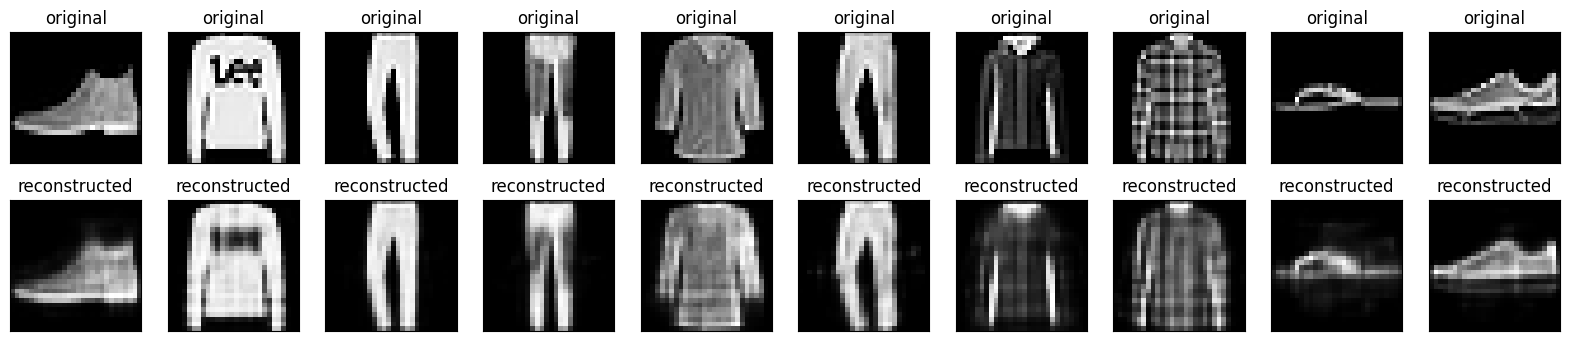

In [10]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  #display original
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i])
  plt.title('original')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstructed
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_images[i])
  plt.title('reconstructed')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

# Denoising

In [11]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train, x_test = x_train.astype('float32')/255.0 , x_test.astype('float32')/255.0

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [12]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train, x_test = x_train.astype('float32')/255.0 , x_test.astype('float32')/255.0
#add this line
x_train, x_test = x_train [..., tf.newaxis], x_test [..., tf.newaxis]
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [13]:
noise_factor = 0.2

x_train_noisy = x_train + noise_factor * tf.random.normal(shape = x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape = x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min = 0, clip_value_max = 1)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min = 0, clip_value_max = 1)

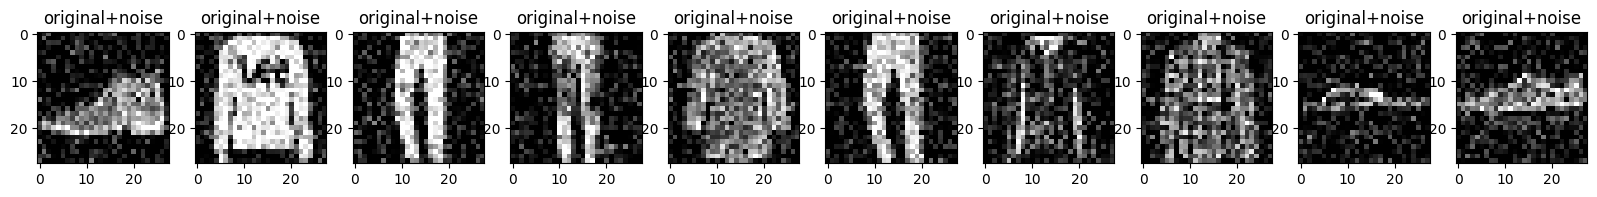

In [14]:
n = 10
plt.figure(figsize=(20,2))

for i in range(n):
  ax = plt.subplot(1,n,i+1)  #????????
  plt.title('original+noise')
  plt.imshow(tf.squeeze(x_test_noisy[i])) # 1 dims are ignore
  plt.gray()

plt.show()

In [15]:
#latent_dim = 64  #try for 20

class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()

    self.encoder = tf.keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(16, (3,3), activation = 'relu', padding='same', strides = 2),
        layers.Conv2D(8, (3,3), activation = 'relu', padding='same', strides = 2),
    ])

    self.decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(8, kernel_size=3, activation = 'relu', padding='same', strides = 2),
        layers.Conv2DTranspose(8, kernel_size=3, activation = 'relu', padding='same', strides = 2),
        layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)

    return decoded



In [16]:
autoencoder2 = Denoise()

In [20]:
autoencoder2.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [21]:
autoencoder2.fit(x_train_noisy, x_train, epochs=10, shuffle=True, validation_data=(x_test_noisy,x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - loss: 0.0381 - val_loss: 0.0104
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 28ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - loss: 0.0083 - val_loss: 0.0080
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 35ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 26ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - loss: 0.0071 - val_loss: 0.0071
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - loss: 0.0070 - val_loss: 0.0069


In [27]:
encoded_images2 = autoencoder2.encoder(x_test).numpy()
decoded_images2 = autoencoder2.decoder(encoded_images2).numpy()

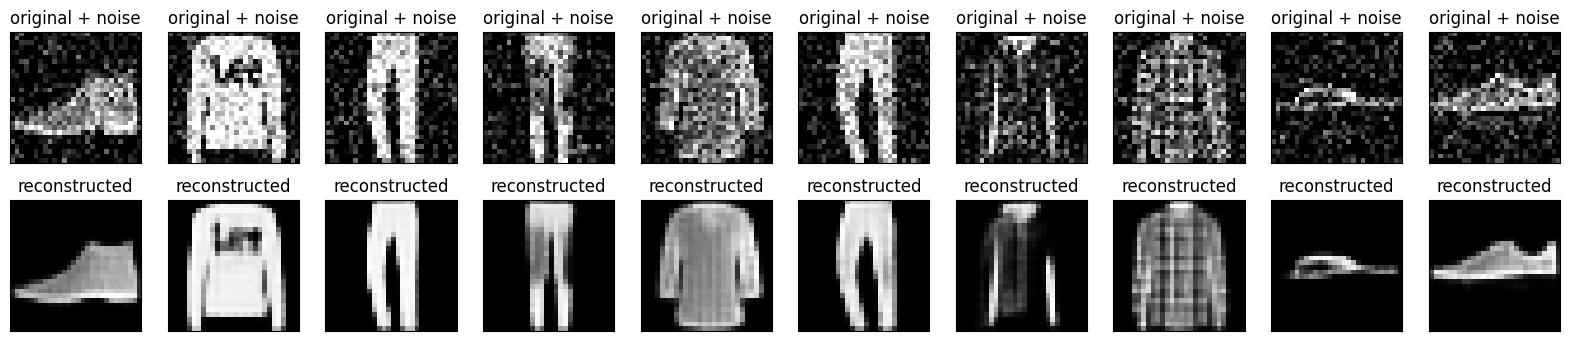

In [28]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  #display original + noise
  ax = plt.subplot(2,n,i+1)
  plt.imshow(tf.squeeze(x_test_noisy[i]))
  plt.title('original + noise')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstructed
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(tf.squeeze(decoded_images2[i]))
  plt.title('reconstructed')
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

## Summary of the Models

In [22]:
autoencoder.encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        50,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,240 (196.25 KB)

 Trainable params: 50,240 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
autoencoder2.encoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 8)        │         1,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
autoencoder.decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (32, 784)              │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (32, 28, 28)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,960 (199.06 KB)

 Trainable params: 50,960 (199.06 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
autoencoder2.decoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_transpose                │ (32, 14, 14, 8)        │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (32, 28, 28, 8)        │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 28, 28, 1)        │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,241 (4.85 KB)

 Trainable params: 1,241 (4.85 KB)

 Non-trainable params: 0 (0.00 B)